# 1. mô tả các thống kê tổng quan về tập dữ liệu (số mẫu, số đặc trưng của 1 mẫu, kiểu dữ liệu của mỗi đặc trưng, số mẫu dữ liệu trống của mỗi đặc trưng,...)

In [32]:
# import thu vien
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [33]:
data = pd.read_csv("rawData_1.csv")
#data.drop(columns=['Unnamed: 12', 'Unnamed: 13'],inplace=True)


In [34]:
data.columns

Index(['Unnamed: 0', 'title', 'address', 'area', 'price', 'number_bedroom',
       'number_wc', 'number_floor', 'direction', 'entrance', 'facade',
       'number_parking', 'id_estate'],
      dtype='object')

In [35]:
data.head()

,Unnamed: 0,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,"Vinhomes Smart City, Phường Trung Văn, Quận Na...",30.0,1.25,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,1,Căn 2 pn full nội thất view hồ 10ha. công viên...,"Vinhomes Smart City, Phường Cầu Diễn, Quận Nam...",55.0,2.10,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...","Tecco Diamond, Xã Tứ Hiệp, Huyện Thanh Trì, Hà...",65.0,1.70,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946737
3,3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,"Tecco Diamond, Thị Trấn Văn Điển, Huyện Thanh ...",69.0,1.93,2.0,2.0,NaN,NaN,NaN,NaN,1.0,3946177
4,4,Chính chủ bán căn hộ chung cư citadines centra...,"Citadines Bình Dương, Phường An Thạnh, Thị Xã ...",114.0,3.05,3.0,2.0,16.0,NaN,50.0,NaN,NaN,3944714


In [36]:
data.isnull().sum()



Unnamed: 0           0
title                0
address              0
area                 0
price                0
number_bedroom     328
number_wc          370
number_floor      1347
direction         1378
entrance          1805
facade            2001
number_parking    1476
id_estate            0
dtype: int64

In [37]:
# data["area"] = data["area"].astype(float)
data["price"] = data["price"].replace("Thỏa thuận", "0")
data["price"] = data["price"].astype(float)
data.describe()

,Unnamed: 0,area,price,number_bedroom,number_wc,number_floor,entrance,facade,number_parking,id_estate
count,2518.000000,2518.000000,2518.000000,2190.000000,2148.000000,1171.000000,713.000000,517.000000,1042.000000,2.518000e+03
mean,1336.396346,65.948034,1.977205,1.976712,1.660615,21.616225,38.867461,213.689942,2.270633,3.903203e+06
std,774.418813,28.201568,1.376620,0.811580,0.654456,59.255214,75.786543,3224.771597,1.356551,1.072902e+05
min,0.000000,0.000000,0.029000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.623702e+06
25%,668.250000,48.000000,1.000000,1.000000,1.000000,10.000000,20.000000,12.000000,1.000000,3.920224e+06
50%,1337.500000,63.000000,1.790000,2.000000,2.000000,20.000000,30.000000,30.000000,2.000000,3.939052e+06
75%,2008.750000,76.000000,2.500000,2.000000,2.000000,29.000000,35.000000,50.000000,4.000000,3.942830e+06
max,2676.000000,349.000000,10.000000,11.000000,11.000000,2012.000000,743.000000,73000.000000,4.000000,3.950141e+06


In [38]:
# count = 0
# for i in range(len(data["price"])):
#     if data["price"][i] > 10 :
#         count += 1
#         # print(data1["price"][i])
#         data["price"] = data["price"].replace(data["price"][i], 0)
    
# # count 
# print(data)

# 2. xuất ra các thống kê mô tả trực quan về các đặc trưng (ví dụ: dùng boxplot, histogram, scatter plot về độ tương quan,…).


- Do tuong quan giua cac dac trung

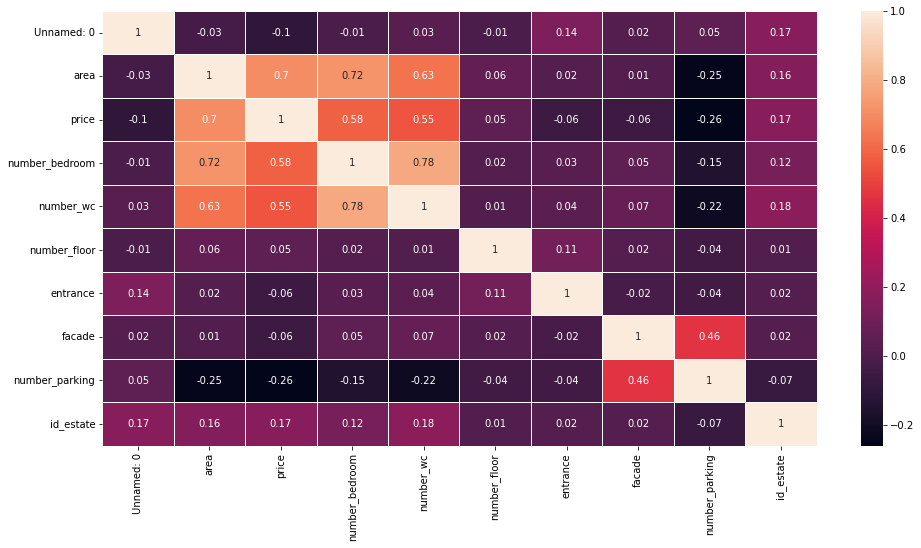

In [39]:
corr = data.corr().round(2)
mask = np.zeros_like(corr)
plt.subplots(figsize=(16, 8))
ax = sns.heatmap(corr, annot=True, linewidths=.5)

- phan bo cua dac trung

<AxesSubplot:xlabel='id_estate', ylabel='Count'>

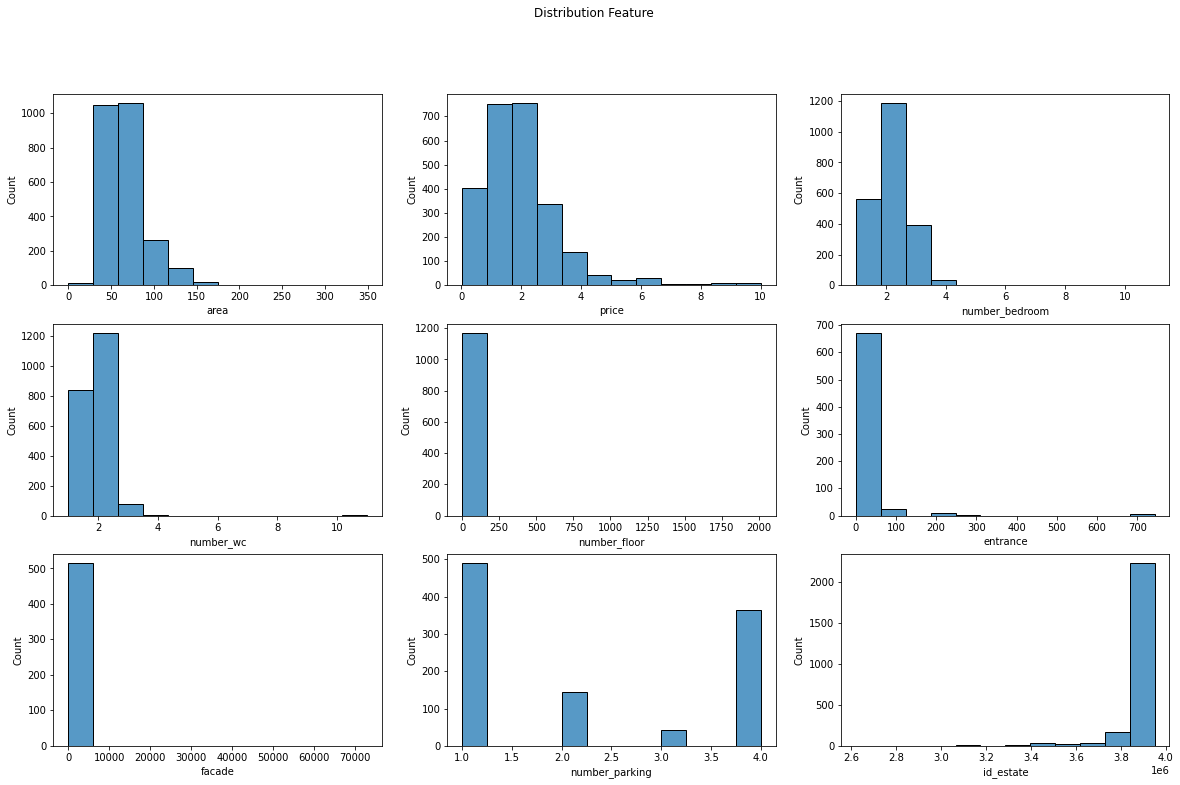

In [40]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

fig.suptitle('Distribution Feature')

sns.histplot(data= data["area"], bins= 12, kde= False, ax= axes[0, 0])
sns.histplot(data= data["price"], bins= 12, kde= False, ax= axes[0, 1])
sns.histplot(data= data["number_bedroom"], bins= 12, kde= False, ax= axes[0, 2])
sns.histplot(data= data["number_wc"], bins= 12, kde= False, ax= axes[1, 0])
sns.histplot(data= data["number_floor"], bins= 12, kde= False, ax= axes[1, 1])
sns.histplot(data= data["entrance"], bins= 12, kde= False, ax= axes[1, 2])
sns.histplot(data= data["facade"], bins= 12, kde= False, ax= axes[2, 0])
sns.histplot(data= data["number_parking"], bins= 12, kde= False, ax= axes[2, 1])
sns.histplot(data= data["id_estate"], bins= 12, kde= False, ax= axes[2, 2])


In [41]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

<AxesSubplot:>

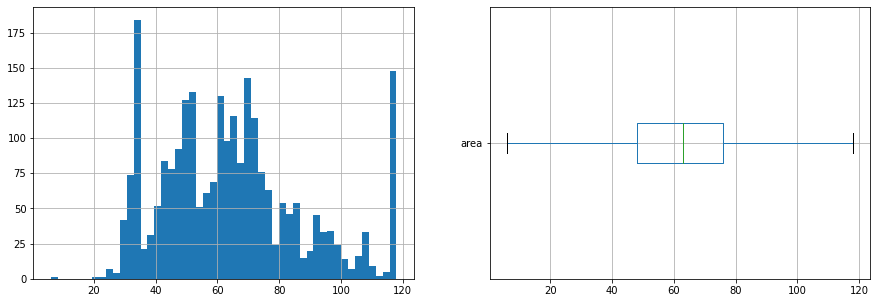

In [42]:


data["area"] = BoxplotOutlierClipper().fit_transform(data["area"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data["area"].hist(bins=50, ax=axes[0])
data["area"].to_frame().boxplot(ax=axes[1], vert=False)


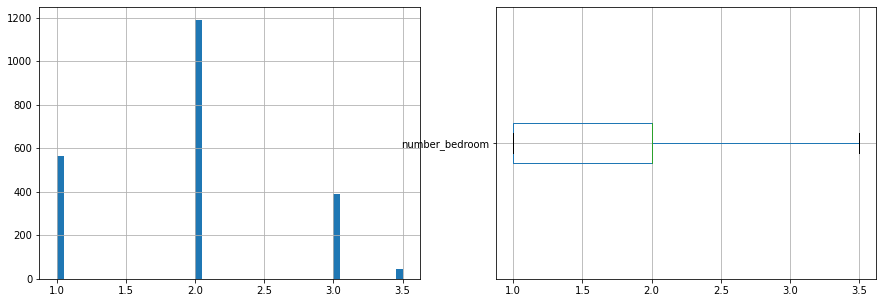

In [43]:
data["number_bedroom"] = BoxplotOutlierClipper().fit_transform(data["number_bedroom"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data["number_bedroom"].hist(bins=50, ax=axes[0])
data["number_bedroom"].to_frame().boxplot(ax=axes[1], vert=False);

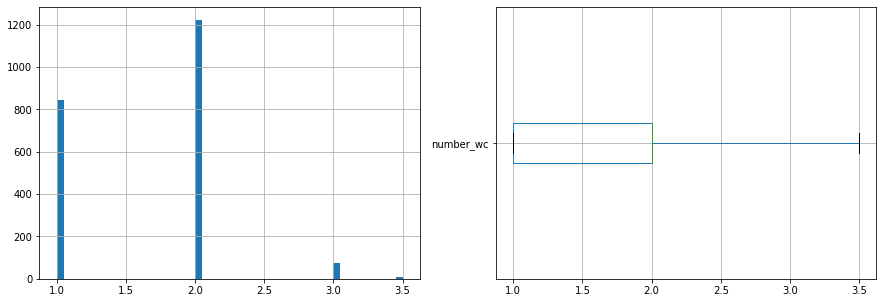

In [44]:
data["number_wc"] = BoxplotOutlierClipper().fit_transform(data["number_wc"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data["number_wc"].hist(bins=50, ax=axes[0])
data["number_wc"].to_frame().boxplot(ax=axes[1], vert=False);

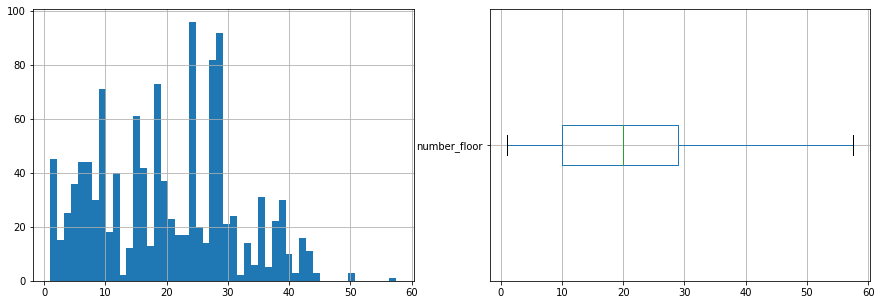

In [45]:
data["number_floor"] = BoxplotOutlierClipper().fit_transform(data["number_floor"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
data["number_floor"].hist(bins=50, ax=axes[0])
data["number_floor"].to_frame().boxplot(ax=axes[1], vert=False);

- quan he giua gia ca voi cac dac trung

<AxesSubplot:xlabel='price', ylabel='number_floor'>

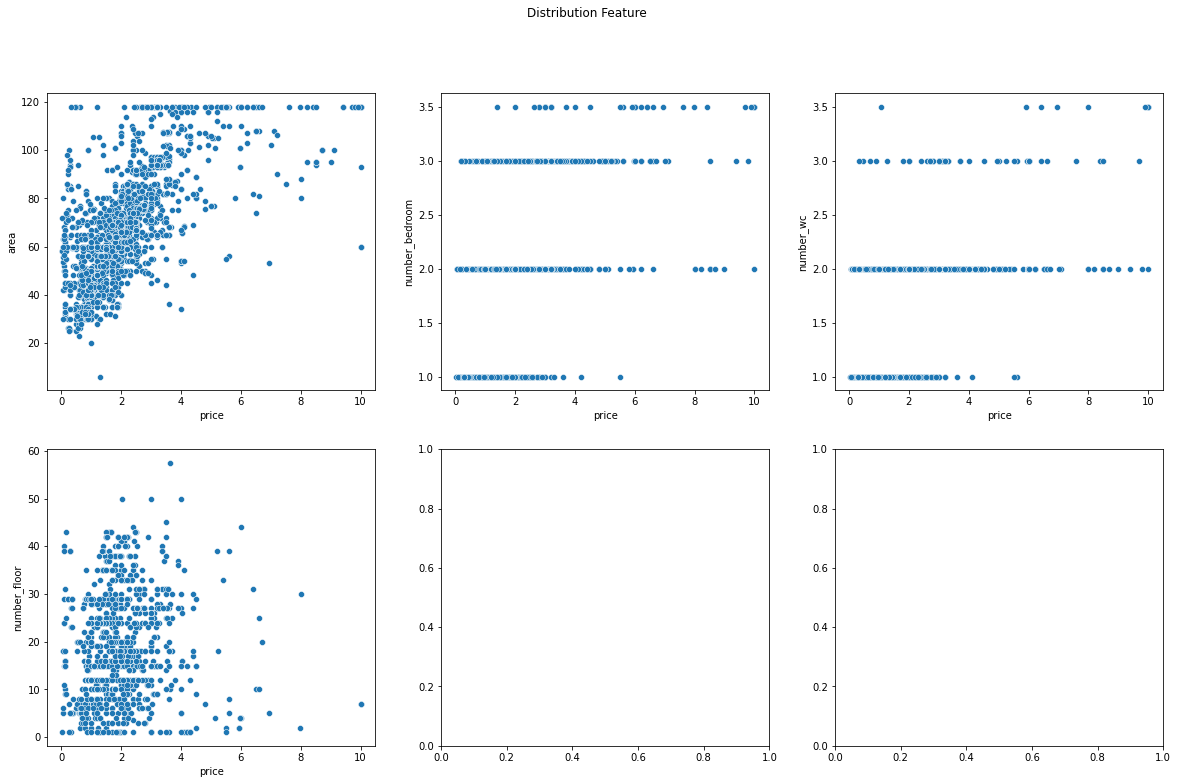

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

fig.suptitle('Distribution Feature')

sns.scatterplot(data=data, x="price", y="area", ax= axes[0, 0])
sns.scatterplot(data=data, x="price", y="number_bedroom", ax= axes[0, 1])
sns.scatterplot(data=data, x="price", y="number_wc", ax= axes[0, 2])
sns.scatterplot(data=data, x="price", y="number_floor", ax= axes[1, 0])


<AxesSubplot:xlabel='price', ylabel='number_floor'>

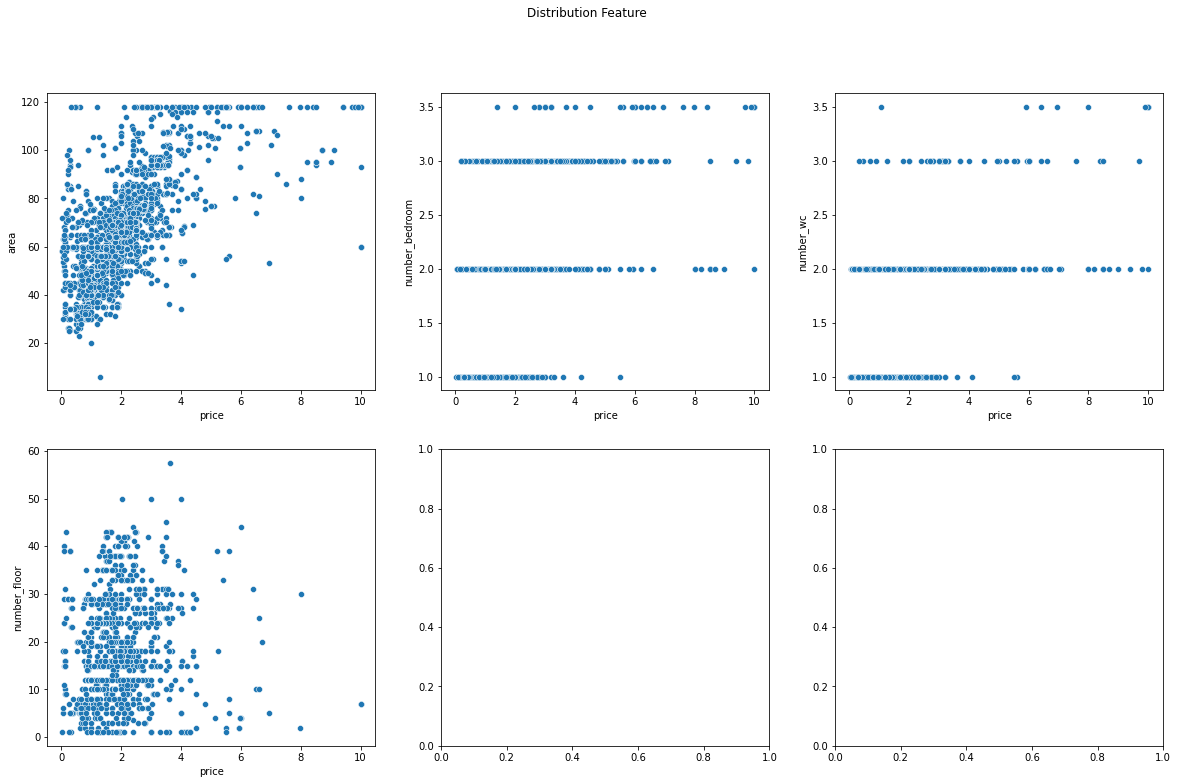

In [47]:
data2=data.copy()
count = 0
for i in range(len(data2["price"])):
    if data2["price"][i] > 10 :
        count += 1
        
        data2["price"] = data2["price"].replace(data2["price"][i], 0)
    

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

fig.suptitle('Distribution Feature')

sns.scatterplot(data=data2, x="price", y="area", ax= axes[0, 0])
sns.scatterplot(data=data2, x="price", y="number_bedroom", ax= axes[0, 1])
sns.scatterplot(data=data2, x="price", y="number_wc", ax= axes[0, 2])
sns.scatterplot(data=data2, x="price", y="number_floor", ax= axes[1, 0])

In [48]:
# data["address"] = address_stat = data["address"].apply(lambda x: x.split(",")[len(x.split(",")) - 1])
data["address"] = data["address"].apply(lambda x: x.split(",")[len(x.split(",")) - 1])

address_stats = data.groupby('address')["address"].agg('count').sort_values(ascending= False)
address_stats

address
 Hà Nội                       1154
 Bình Dương                    526
 TP HCM                        321
 Bình Định                     145
 Đồng Nai                       53
 Đà Nẵng                        38
                                35
 Khánh Hòa                      34
 Bắc Ninh                       25
 Quảng Ninh                     24
 Hưng Yên                       20
 Bà Rịa - Vũng Tàu              19
                                17
 Hải Phòng                      16
 Bắc Giang                      16
 Thanh Hóa                      12
 Quảng Bình                     10
 Vĩnh Phúc                       8
 Nghệ An                         7
 Ha Noi                          5
 Phú Thọ                         5
 Vĩnh Phúc                       4
 B\u00ECnh D\u01B0\u01A1ng       3
 Vĩnh Long                       3
 B\u00ECnh \u0110\u1ECBnh        3
 Thái Nguyên                     2
 Long An                         2
 Tây Ninh                        2
 Đắk Lắk    

In [49]:
data1 = data.copy()
data1['number_bedroom'] = data1['number_bedroom'].replace(np.nan, np.nanmedian(data1['number_bedroom']))
data1['number_wc'] = data1['number_wc'].replace(np.nan, np.nanmedian(data1['number_wc']))
data1['number_floor'] = data1['number_floor'].replace(np.nan, np.nanmedian(data1['number_floor']))
data1['entrance'] = data1['entrance'].replace(np.nan, np.nanmedian(data1['entrance']))
data1['facade'] = data1['facade'].replace(np.nan, np.nanmedian(data1['facade']))
data1['number_parking'] = data1['number_parking'].replace(np.nan, np.nanmedian(data1['number_parking']))
data1.isna().sum()
# print(np.nanmedian(data1['number_parking']))

Unnamed: 0           0
title                0
address              0
area                 0
price                0
number_bedroom       0
number_wc            0
number_floor         0
direction         1378
entrance             0
facade               0
number_parking       0
id_estate            0
dtype: int64

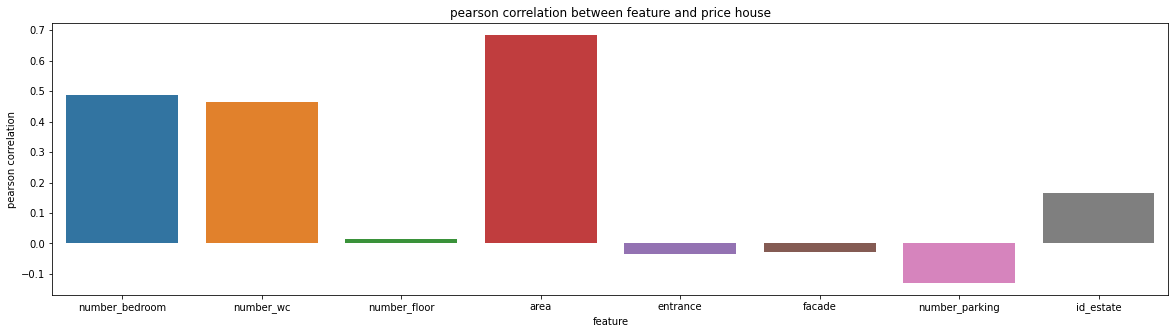

In [50]:
from scipy import stats
var = ['number_bedroom', 'number_wc', 'number_floor', 'area', 'entrance',
       'facade', 'number_parking', 'id_estate']

pear_corr = []

for item in var:
  temp = stats.pearsonr(data1[item], data1['price'])[0]
  pear_corr.append(temp)
  
plt.figure(figsize=(20,5))
plt.title('pearson correlation between feature and price house')
ax = sns.barplot(x=var, y=pear_corr)
ax.set(xlabel='feature', ylabel='pearson correlation')

plt.show()

In [51]:
data1.head()

,Unnamed: 0,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,Hà Nội,30.0,1.25,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,1,Căn 2 pn full nội thất view hồ 10ha. công viên...,Hà Nội,55.0,2.10,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...",Hà Nội,65.0,1.70,2.0,2.0,20.0,NaN,30.0,30.0,1.0,3946737
3,3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,Hà Nội,69.0,1.93,2.0,2.0,20.0,NaN,30.0,30.0,1.0,3946177
4,4,Chính chủ bán căn hộ chung cư citadines centra...,Bình Dương,114.0,3.05,3.0,2.0,16.0,NaN,50.0,30.0,2.0,3944714


In [52]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(data1['address'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
# genre_mappings
data1


,Unnamed: 0,title,address,area,price,number_bedroom,number_wc,number_floor,direction,entrance,facade,number_parking,id_estate
0,0,Căn hộ nghỉ dưỡng ngay trung tâm hà nội chỉ 1 ...,Hà Nội,30.0,1.250,1.0,1.0,27.0,Đông bắc,30.0,30.0,3.0,3947348
1,1,Căn 2 pn full nội thất view hồ 10ha. công viên...,Hà Nội,55.0,2.100,2.0,1.0,20.0,Đông bắc,50.0,5.0,3.0,3947371
2,2,"Duy nhất căn 2 ngủ tầng đẹp giá 1 tỷ 779triệu,...",Hà Nội,65.0,1.700,2.0,2.0,20.0,NaN,30.0,30.0,1.0,3946737
3,3,Nhận nhà ở ngay không lo trả lãi tại teccodiam...,Hà Nội,69.0,1.930,2.0,2.0,20.0,NaN,30.0,30.0,1.0,3946177
4,4,Chính chủ bán căn hộ chung cư citadines centra...,Bình Dương,114.0,3.050,3.0,2.0,16.0,NaN,50.0,30.0,2.0,3944714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2672,"Mở bán căn hộ tttp.thuận an, giá 896 triêu/căn...",Bình Dương,42.0,0.896,1.0,1.0,20.0,NaN,30.0,30.0,2.0,3931551
2514,2673,"48m2 bàn giao 1pn có thể tự ngăn thành 2pn, ch...",Bình Dương,48.0,1.200,1.0,1.0,10.0,NaN,30.0,30.0,2.0,3931239
2515,2674,Sắp mở bán dự án căn hộ thuận an - giá gốc đầu...,Bình Dương,33.0,0.800,1.0,1.0,20.0,NaN,30.0,30.0,2.0,3932155
2516,2675,Căn hộ độc tôn ngay tp.thuận an cạnh aeon mall...,Bình Dương,32.0,0.800,1.0,1.0,20.0,NaN,30.0,30.0,2.0,3918708


In [53]:
# corr = data1.corr().round(2)
# mask = np.zeros_like(corr)
# plt.subplots(figsize=(16, 8))
# ax = sns.heatmap(corr, vmin=0, vmax=1, annot=True, linewidths=.5)

In [54]:
# fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# fig.suptitle('Distribution Feature')

# sns.displot(data= data1["area"])
# plt.show()
# sns.displot(data= data["price"], ax= axes[0, 1])
# sns.displot(data= data["number_bedroom"], ax= axes[0, 2])
# sns.displot(data= data["number_wc"], ax= axes[1, 0])
# sns.displot(data= data["number_floor"], ax= axes[1, 1])
# sns.displot(data= data["entrance"], ax= axes[1, 2])
# sns.displot(data= data["facade"], ax= axes[2, 0])
# sns.displot(data= data["number_parking"], ax= axes[2, 1])
# sns.displot(data= data["id_estate"], ax= axes[2, 2])
# count = 0
# for i in range(len(data["price"])):
#     if data["price"][i] > 10 :
#         count += 1
#         # print(data1["price"][i])
#         data["price"] = data["price"].replace(data["price"][i], 0)
    
# # count 
# print(data)

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [56]:
X=data[["area", "number_bedroom", "number_wc", "id_estate", "address","number_floor"]]
y = data["price"].astype(float)
X

,area,number_bedroom,number_wc,id_estate,address,number_floor
0,30.0,1.0,1.0,3947348,Hà Nội,27.0
1,55.0,2.0,1.0,3947371,Hà Nội,20.0
2,65.0,2.0,2.0,3946737,Hà Nội,NaN
3,69.0,2.0,2.0,3946177,Hà Nội,NaN
4,114.0,3.0,2.0,3944714,Bình Dương,16.0
...,...,...,...,...,...,...
2513,42.0,1.0,1.0,3931551,Bình Dương,NaN
2514,48.0,1.0,1.0,3931239,Bình Dương,10.0
2515,33.0,1.0,1.0,3932155,Bình Dương,NaN
2516,32.0,1.0,1.0,3918708,Bình Dương,NaN


In [57]:
imp_median = SimpleImputer(strategy='median', add_indicator=True)
scaler = StandardScaler()
imp_constant = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(handle_unknown='ignore')
num_cols = make_column_selector(dtype_include='number')
cat_cols = make_column_selector(dtype_exclude='number')
preprocessor = make_column_transformer(
    (make_pipeline(imp_median, scaler), num_cols),
    (make_pipeline(imp_constant, ohe), cat_cols)
)

In [58]:

def pipeline_model1(X, y, data):
    pipe = make_pipeline(preprocessor, RandomForestRegressor())

    print(cross_val_score(pipe, X, y).mean())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=32)

    pipe.fit(X_train, y_train)
    
    predict = pipe.predict(X_test)
    print(f'MSE             : {metrics.mean_squared_error(y_test, predict)}\n'
          f'\nRMSE            : '
          f'{np.sqrt(metrics.mean_squared_error(y_test, predict))}\n'
          f'MAE             : {metrics.mean_absolute_error(y_test, predict)}\n'
          #f'Mean abs % error: '
         
          #f'{metrics.mean_absolute_percentage_error(y_test, predict)}\n'
          f'\n'
        )
      
 
    visualize_model_results(data, pipe)
    visualize_model_results1(data, pipe)
def pipeline_model2(X, y, data):
    pipe = make_pipeline(preprocessor, XGBRegressor())

    print(cross_val_score(pipe, X, y).mean())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=32)

    pipe.fit(X_train, y_train)

    predict = pipe.predict(X_test)
  
    print(f'MSE             : {metrics.mean_squared_error(y_test, predict)}\n'
          f'\nRMSE            : '
          f'{np.sqrt(metrics.mean_squared_error(y_test, predict))}\n'
          f'MAE             : {metrics.mean_absolute_error(y_test, predict)}\n'
          #f'Mean abs % error: '
          #f'{metrics.mean_absolute_percentage_error(y_test, predict)}\n'
          f'\n'
         
       )
        
   
    visualize_model_results(data, pipe)
    visualize_model_results1(data, pipe)


def visualize_model_results(data, model):
    fig = plt.figure(figsize=(17, 10))
    data = data.sort_values(by=['price'])
    X = data[["area", "number_bedroom", "number_wc", "id_estate", "address","number_floor"]]
    y = data.price.astype(float)
    
    plt.scatter(range(X.shape[0]), y, color='red', label='Real')
    plt.scatter(range(X.shape[0]), model.predict(X), marker='.', label='Predict')

    plt.legend(loc=2, prop={'size': 25})
def visualize_model_results1(data, model):
    fig = plt.figure(figsize=(17, 10))
    data = data.sort_values(by=['price'])
    X = data[["area", "number_bedroom", "number_wc", "id_estate", "address","number_floor"]]
    y = data.price.astype(float)
  
    x_t=model.predict(X)
    y_10=[]
    X_10=[]
    for i in range(len(data["price"])):
        if x_t[i] > 10 :
            x_t[i]=0;
        if y[i]>10:
            y[i]=0;
            
    
    plt.scatter(range(X.shape[0]),y, color='red', label='Real')
    plt.scatter(range(X.shape[0]), x_t, marker='.', label='Predict')
    plt.legend(loc=2, prop={'size': 25})      
    


0.5695761337996423
MSE             : 0.850476723213646

RMSE            : 0.9222129489514046
MAE             : 0.4916039705820106




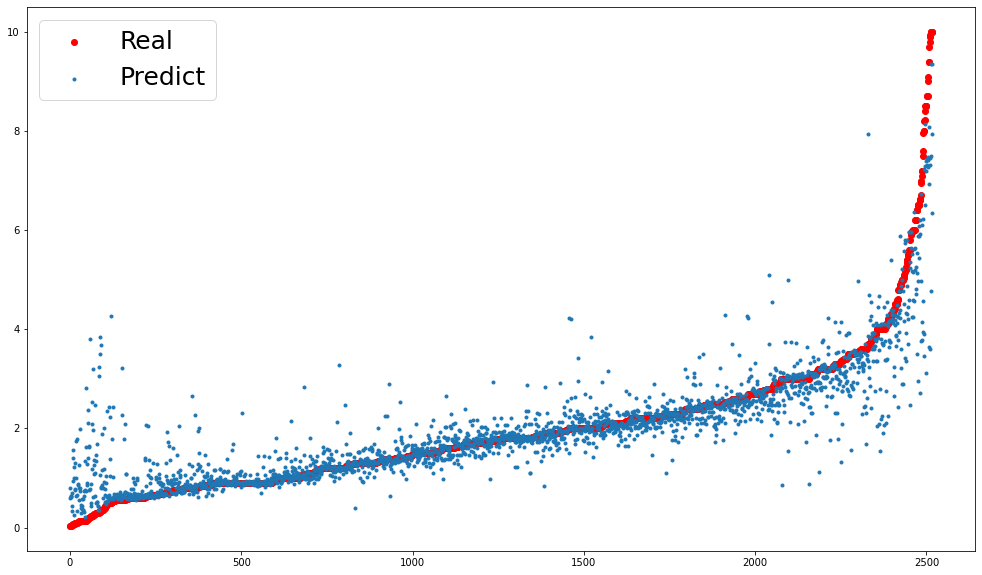

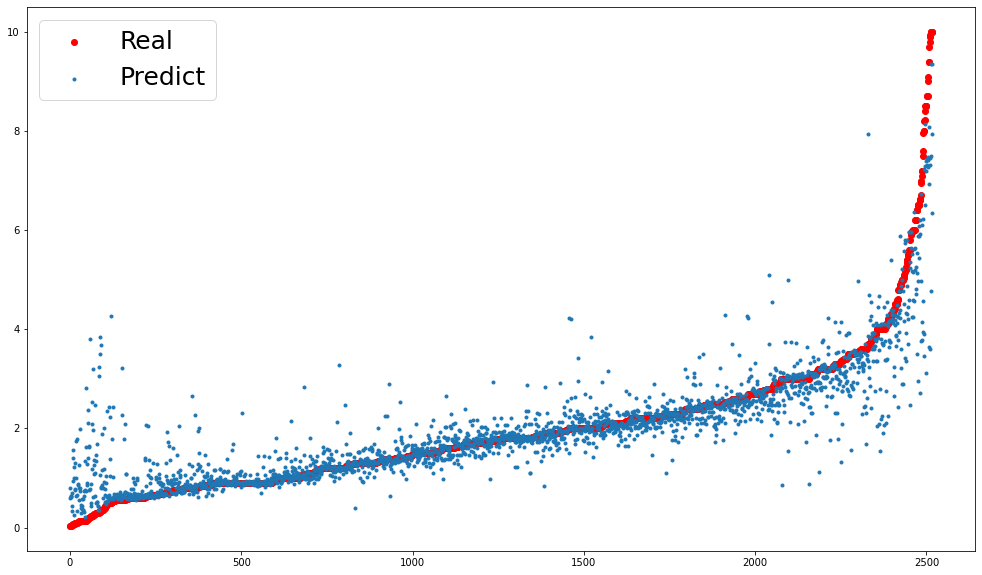

In [59]:
pipeline_model1(X, y, data1)

0.5357328564787027
MSE             : 0.9075377503148686

RMSE            : 0.9526477577336067
MAE             : 0.5103372304112453




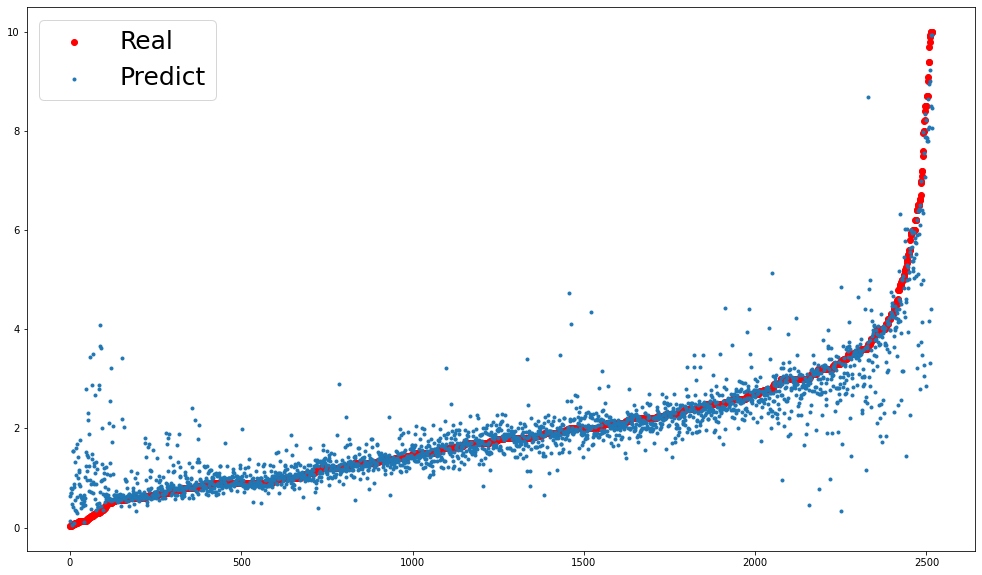

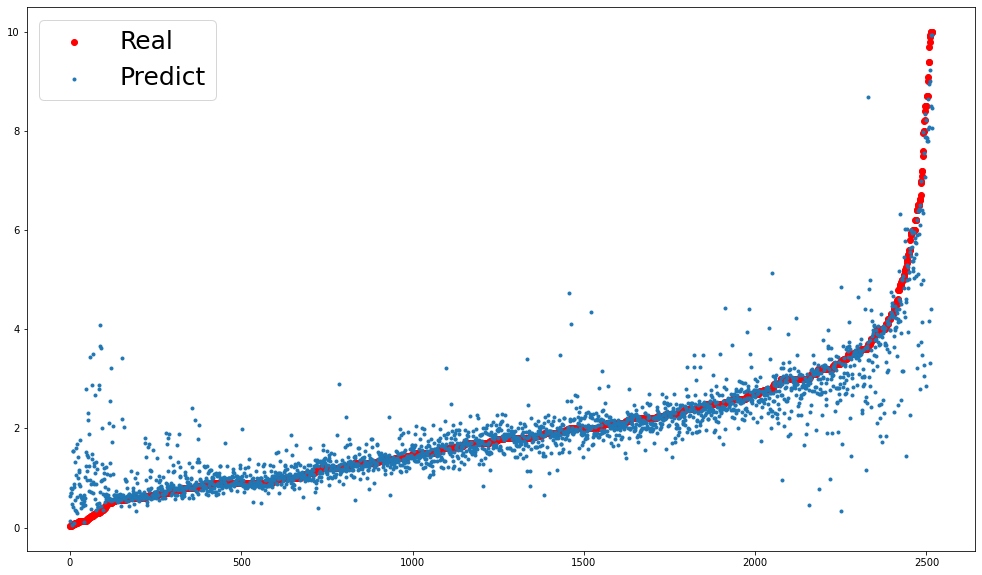

In [60]:
pipeline_model2(X, y, data1)

             | ------------------------| ------------------- |
             | RandomForestRegressor() | XGBRegressor()
MSE          | 76890.81399470281       | 100814.4976290109
RMSE         | 277.291929191426        | 317.51298812648736  
MAE          | 59.60421711389925       | 76.82134093653613  